In [41]:
import numpy as np 
import matplotlib.pyplot as plt

In [42]:
class TriangularMF:
    def __init__(self, name, a, b, c):
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def membership(self, x):
        x = np.array(x)
        y = np.zeros_like(x)

        # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) / (self.b - self.a), y)

        # Región decreciente
        y = np.where((self.b < x) & (x < self.c), (self.c - x) / (self.c - self.b), y)

        return y
    
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf


In [43]:
class TrapezoidalMF:
    def __init__(self, name, a, b, c, d):
        """
        Inicializa la función trapezoidal.
        - a, d: Límites donde la membresía es 0.
        - b, c: Límites donde la membresía es 1.
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor o arreglo de valores.
        """
        x = np.array(x)  # Asegúrate de que x sea un arreglo de numpy
        y = np.zeros_like(x)

        # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) / (self.b - self.a), y)

        # Región constante
        y = np.where((self.b < x) & (x <= self.c), 1.0, y)

        # Región decreciente
        y = np.where((self.c < x) & (x < self.d), (self.d - x) / (self.d - self.c), y)

        return y
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf


In [44]:


class GaussianMF:
    def __init__(self, name, a, b, c):
        """
        Inicializa la función gaussiana con tres parámetros.
        - name: Nombre del término (e.g., 'medium').
        - a: Altura máxima de la curva.
        - b: Centro de la curva.
        - c: Anchura de la curva (desviación estándar).
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor x.
        Devuelve un valor entre 0 y 'a'.
        """
        return self.a * np.exp(-((x - self.b) ** 2) / (2 * self.c ** 2))
    
    
    
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf
    
    
    def plot(self, resolution=100):
        """
        Grafica la función triangular.
        - resolution: Número de puntos para la gráfica.
        """
        # Generar puntos en el rango [a, c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name)
        plt.title(f"Triangular Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, 1.1)  # Limitar el rango de la gráfica
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid()
        plt.legend()
        plt.show()

    def plot_with_membership(self, x_value, resolution=100):
        """
        Grafica la función gaussiana y resalta el grado de membresía para un valor específico.
        - x_value: Valor crisp para calcular y graficar el grado de pertenencia.
        - resolution: Número de puntos para la gráfica.
        """
        # Generar puntos en el rango [b - 3*c, b + 3*c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]

        # Calcular el grado de membresía para el valor dado
        y_value = self.membership(x_value)

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name, color='blue')  # Función gaussiana
        plt.scatter([x_value], [y_value], color='red', zorder=5, label=f"({x_value}, {y_value:.2f})")  # Punto
        plt.vlines(x_value, 0, y_value, color='red', linestyle='--', label="Grado de pertenencia")  # Línea vertical

        # Etiquetas y configuración
        plt.title(f"Gaussian Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, self.a + 0.1)  # Limitar el rango de la gráfica
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid()
        plt.legend()
        plt.show()


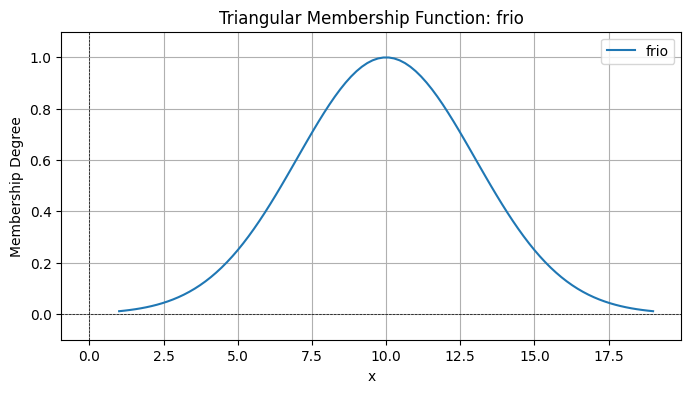

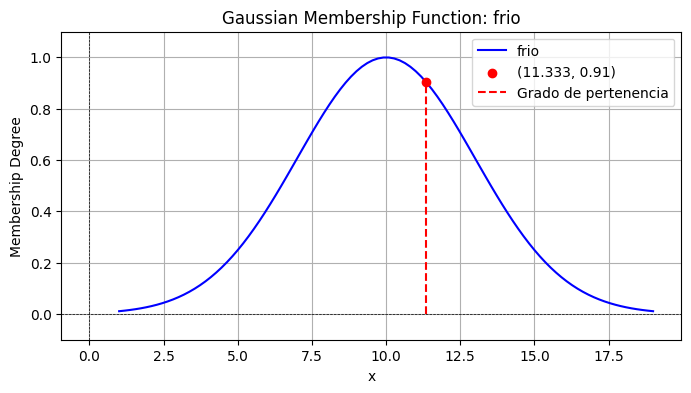

In [45]:
example=GaussianMF('frio',1,10,3)

example.plot()

example.plot_with_membership(11.333)

In [46]:
class TermSet:
    def __init__(self, name, universe_min, universe_max):
        """
        Inicializa un conjunto difuso.
        - name: Nombre de la variable lingüística (e.g., 'Velocity').
        - universe_min: Valor mínimo del universo.
        - universe_max: Valor máximo del universo.
        """
        self.name = name
        self.universe_min = universe_min
        self.universe_max = universe_max
        self.terms = {}  # Diccionario para almacenar los términos

    def add_term(self, term):
        """
        Agrega un término difuso al TermSet.
        - term: Objeto de tipo TriangularMF, TrapezoidalMF o GaussianMF.
        """
        self.terms[term.name] = term

    def get(self, term_name):
        """
        Obtiene un término por su nombre.
        - term_name: Nombre del término (e.g., 'Low').
        """
        return self.terms.get(term_name)

    def to_dict(self):
        """
        Convierte el TermSet en un diccionario.
        """
        return self.terms

    def plot(self, resolution=100):
        """
        Grafica todas las funciones de membresía del TermSet.
        - resolution: Número de puntos para la gráfica.
        """

        # Crear el rango del universo
        x = np.linspace(self.universe_min, self.universe_max, resolution)

        # Graficar cada término
        plt.figure(figsize=(10, 6))
        for term_name, term in self.terms.items():
            y = [term.membership(value) for value in x]
            plt.plot(x, y, label=term_name)

        # Configuración de la gráfica
        plt.title(f"TermSet: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Grado de Membresía")
        plt.ylim(-0.1, 1.1)
        plt.grid()
        plt.legend()
        plt.show()


In [47]:
# Crear términos difusos
low_velocity = TriangularMF("Low", 0, 25, 50)
medium_velocity = GaussianMF("Medium", a=1, b=50, c=15)
high_velocity = TrapezoidalMF("High", 60, 80, 100, 120)


In [48]:
velocity_terms = TermSet(name="Velocity", universe_min=0, universe_max=120)

# Agregar términos al TermSet
velocity_terms.add_term(low_velocity)
velocity_terms.add_term(medium_velocity)
velocity_terms.add_term(high_velocity)

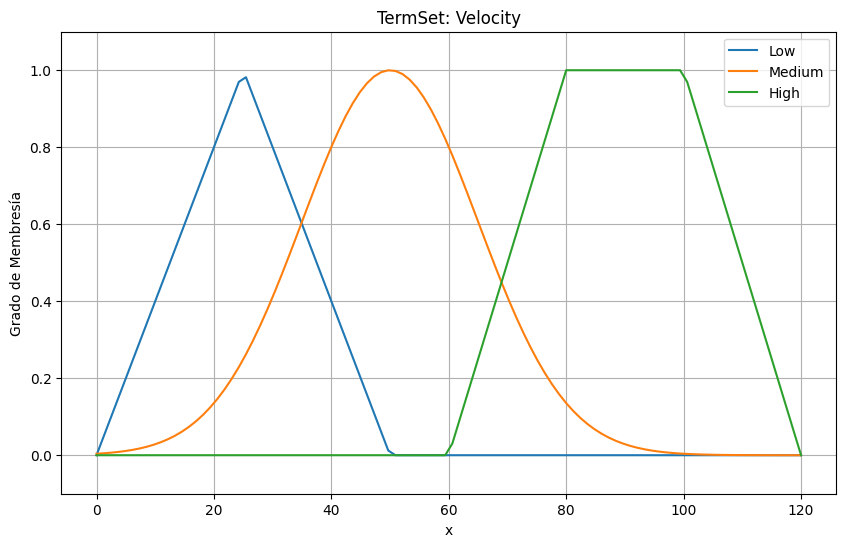

In [49]:
velocity_terms.plot()

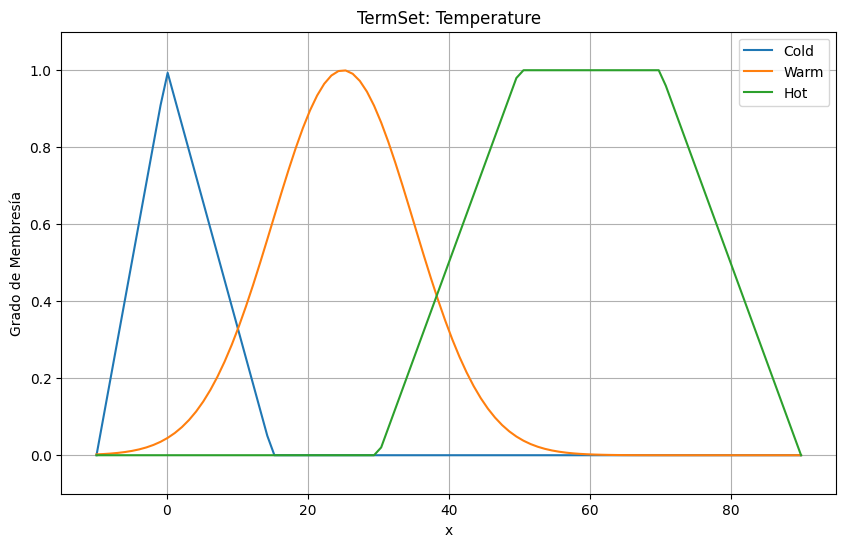

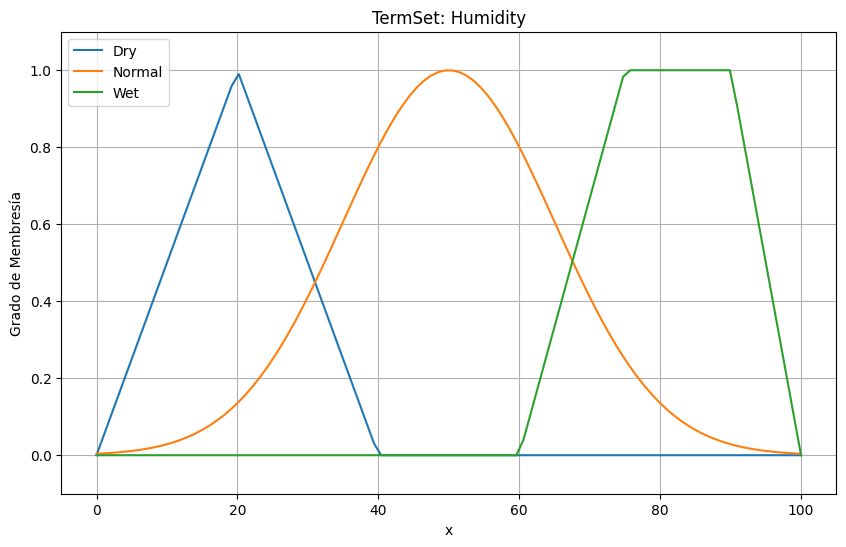

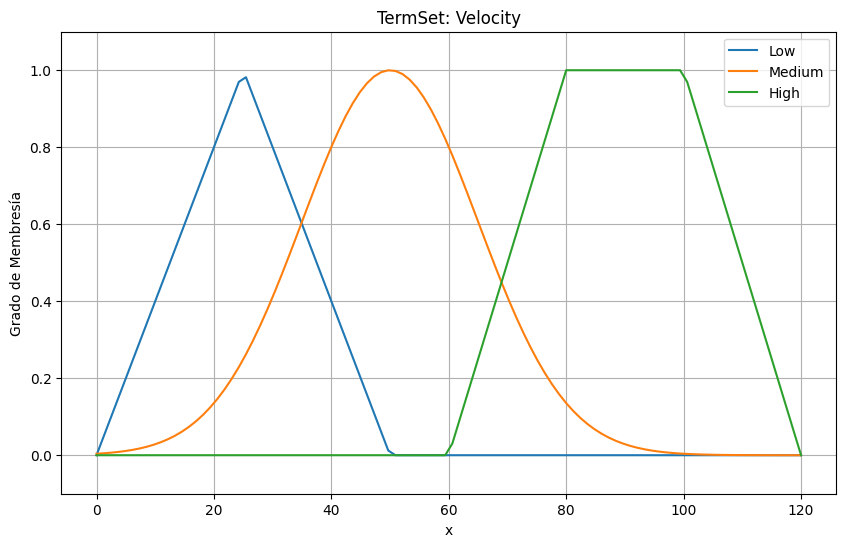

In [50]:
# Definir los términos para la variable "Temperature"
cold_temperature = TriangularMF("Cold", a=-10, b=0, c=15)
warm_temperature = GaussianMF("Warm", a=1.0, b=25, c=10)  # Gaussiana
hot_temperature = TrapezoidalMF("Hot", a=30, b=50, c=70, d=90)  # Trapezoidal

temperature_terms = TermSet(name="Temperature", universe_min=-10, universe_max=90)
temperature_terms.add_term(cold_temperature)
temperature_terms.add_term(warm_temperature)
temperature_terms.add_term(hot_temperature)

# Definir los términos para la variable "Humidity"
dry_humidity = TriangularMF("Dry", a=0, b=20, c=40)
normal_humidity = GaussianMF("Normal", a=1.0, b=50, c=15)  # Gaussiana
wet_humidity = TrapezoidalMF("Wet", a=60, b=75, c=90, d=100)  # Trapezoidal

humidity_terms = TermSet(name="Humidity", universe_min=0, universe_max=100)
humidity_terms.add_term(dry_humidity)
humidity_terms.add_term(normal_humidity)
humidity_terms.add_term(wet_humidity)

# Graficar ambos TermSets
temperature_terms.plot()
humidity_terms.plot()
velocity_terms.plot()


In [51]:
class MamdaniRule:
    def __init__(self, antecedent, consequent):
        self.antecedent = antecedent  # Lista de condiciones (variable, término)
        self.consequent = consequent  # Término de salida

    def __str__(self):
        antecedent_str = " y ".join(f"{var} es {term.name}" for var, term in self.antecedent)
        return f"Si {antecedent_str}, entonces salida es {self.consequent.name}."

In [52]:
# Crear términos de salida para "Fan Speed"
low_speed = TriangularMF(name="Low", a=0, b=25, c=50)
medium_speed = TriangularMF(name="Medium", a=25, b=50, c=75)
high_speed = TriangularMF(name="High", a=50, b=75, c=100)

fan_speed_terms = TermSet(name="Fan Speed", universe_min=0, universe_max=100)
fan_speed_terms.add_term(low_speed)
fan_speed_terms.add_term(medium_speed)
fan_speed_terms.add_term(high_speed)

In [53]:
class FuzzyInferenceSystem:
    def __init__(self, input_termsets, output_termset, rules):
        """
        Inicializa el Sistema de Inferencia Difusa.
        - input_termsets: Diccionario con los TermSets de entrada.
        - output_termset: TermSet de salida.
        - rules: Lista de reglas difusas (MamdaniRule).
        """
        self.input_termsets = input_termsets
        self.output_termset = output_termset
        self.rules = rules

    def fuzzify(self, inputs):
        """
        Fuzzifica las entradas crisp.
        - inputs: Diccionario con los valores crisp de entrada.
        Devuelve: Diccionario con los grados de membresía.
        """
        fuzzified = {}
        for var_name, crisp_value in inputs.items():
            termset = self.input_termsets[var_name]
            fuzzified[var_name] = {
                term_name: term.membership(crisp_value)
                for term_name, term in termset.terms.items()
            }
        print(f"Fuzzificación: {fuzzified}")
        return fuzzified

    def evaluate_rules(self, fuzzified_inputs):
        output_mfs = []
        for rule in self.rules:
            antecedent_values = [
                fuzzified_inputs[var_name][term.name]
                for var_name, term in rule.antecedent
            ]
            rule_strength = min(antecedent_values)  # Calcula la fuerza mínima del antecedente

            print(f"Evaluando regla: {rule}, Fuerza de activación: {rule_strength}")

            if rule_strength > 0:  # Verifica si la regla se activa
                if hasattr(rule.consequent, "scale_membership"):
                    scaled_mf = rule.consequent.scale_membership(rule_strength)
                    output_mfs.append(scaled_mf)
                else:
                    print(f"Error: El término {rule.consequent.name} no tiene el método 'scale_membership'.")
            else:
                print(f"La regla {rule} no se activó.")

        return output_mfs

    def aggregate_outputs(self, output_mfs):
        """
        Agrega las funciones de membresía escaladas en una sola función de salida.
        Devuelve: La función de membresía agregada.
        """
        if not output_mfs:
            print("No se encontraron funciones de membresía escaladas. El conjunto de salida está vacío.")
            return None, None

        universe = np.linspace(
            self.output_termset.universe_min,
            self.output_termset.universe_max,
            100
        )
        aggregated = np.zeros_like(universe)
        for mf in output_mfs:
            aggregated = np.maximum(aggregated, mf(universe))
        print(f"Conjunto difuso agregado: {aggregated}")
        return universe, aggregated

    def defuzzify(self, universe, aggregated_mf):
        """
        Desfuzzifica el conjunto difuso usando el método del centroide.
        Devuelve: Un valor crisp.
        """
        if universe is None or aggregated_mf is None:
            print("No se puede realizar la desfuzzificación: el conjunto difuso agregado está vacío.")
            return 0

        numerator = np.sum(universe * aggregated_mf)
        denominator = np.sum(aggregated_mf)
        return numerator / denominator if denominator != 0 else 0

    def simulate(self, inputs):
        """
        Ejecuta el sistema de inferencia difusa completo.
        - inputs: Diccionario con valores crisp de entrada.
        Devuelve: Un valor crisp de salida.
        """
        # Paso 1: Fuzzificación
        fuzzified_inputs = self.fuzzify(inputs)

        # Paso 2: Evaluación de reglas
        output_mfs = self.evaluate_rules(fuzzified_inputs)

        # Paso 3: Agregación
        universe, aggregated_mf = self.aggregate_outputs(output_mfs)

        # Paso 4: Desfuzzificación
        return self.defuzzify(universe, aggregated_mf)


In [54]:
rules = [
    # Reglas con Temperature y Humidity
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Warm")),
            ("Humidity", humidity_terms.get("Wet"))
        ],
        consequent=fan_speed_terms.get("Medium")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Cold")),
            ("Humidity", humidity_terms.get("Dry"))
        ],
        consequent=fan_speed_terms.get("Low")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Cold")),
            ("Humidity", humidity_terms.get("Normal"))
        ],
        consequent=fan_speed_terms.get("Low")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Cold")),
            ("Humidity", humidity_terms.get("Wet"))
        ],
        consequent=fan_speed_terms.get("Low")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Warm")),
            ("Humidity", humidity_terms.get("Dry"))
        ],
        consequent=fan_speed_terms.get("Medium")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Warm")),
            ("Humidity", humidity_terms.get("Normal"))
        ],
        consequent=fan_speed_terms.get("Medium")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Warm")),
            ("Humidity", humidity_terms.get("Wet"))
        ],
        consequent=fan_speed_terms.get("Medium")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Hot")),
            ("Humidity", humidity_terms.get("Dry"))
        ],
        consequent=fan_speed_terms.get("High")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Hot")),
            ("Humidity", humidity_terms.get("Normal"))
        ],
        consequent=fan_speed_terms.get("High")
    ),
    MamdaniRule(
        antecedent=[
            ("Temperature", temperature_terms.get("Hot")),
            ("Humidity", humidity_terms.get("Wet"))
        ],
        consequent=fan_speed_terms.get("High")
    )
]



In [55]:
fis = FuzzyInferenceSystem(
    input_termsets={"Temperature": temperature_terms, "Humidity": humidity_terms},
    output_termset=fan_speed_terms,
    rules=rules
)

In [56]:
# Simular el sistema con entradas
inputs = {"Temperature": 80, "Humidity": 40}
output = fis.simulate(inputs)

# Mostrar la salida crisp
print(f"Salida crisp (Fan Speed): {output}")

Fuzzificación: {'Temperature': {'Cold': array(0.), 'Warm': np.float64(2.699578503363014e-07), 'Hot': array(0.5)}, 'Humidity': {'Dry': array(0.), 'Normal': np.float64(0.8007374029168081), 'Wet': array(0.)}}
Evaluando regla: Si Temperature es Warm y Humidity es Wet, entonces salida es Medium., Fuerza de activación: 0.0
La regla Si Temperature es Warm y Humidity es Wet, entonces salida es Medium. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Dry, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Dry, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Normal, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Normal, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Wet, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Wet, entonces salida es Low. 

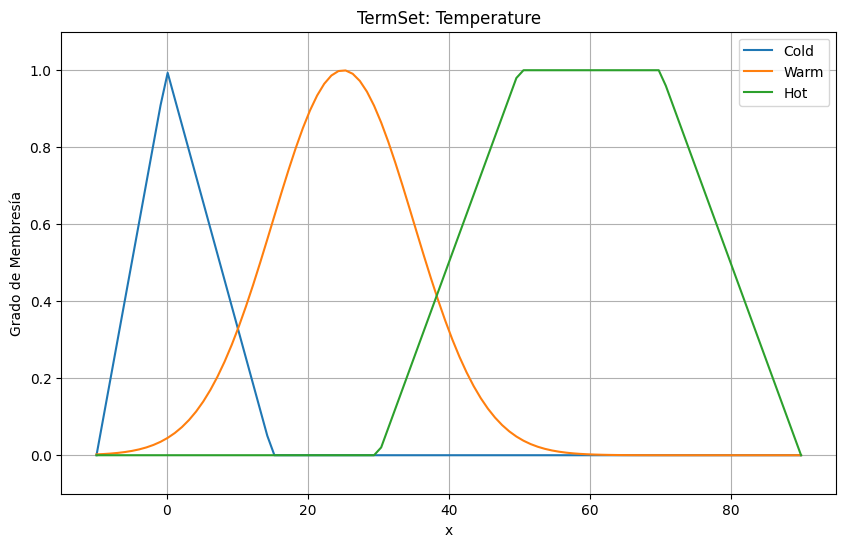

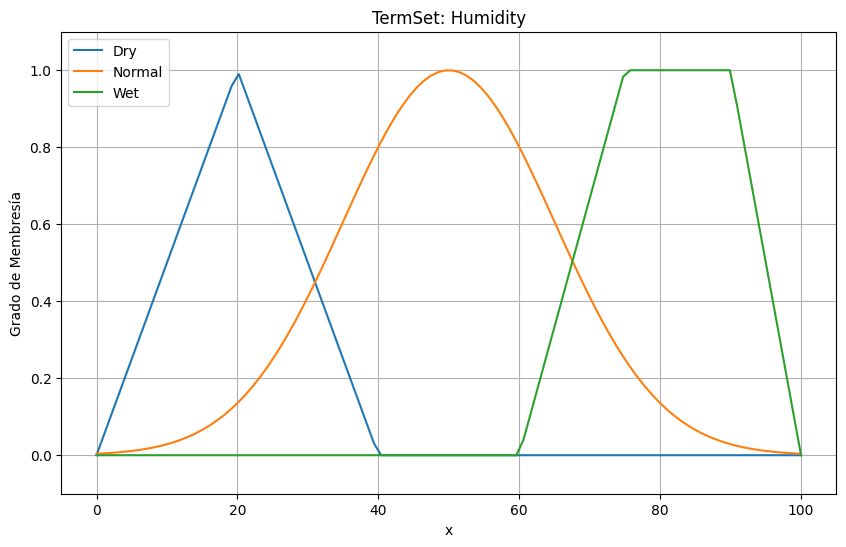

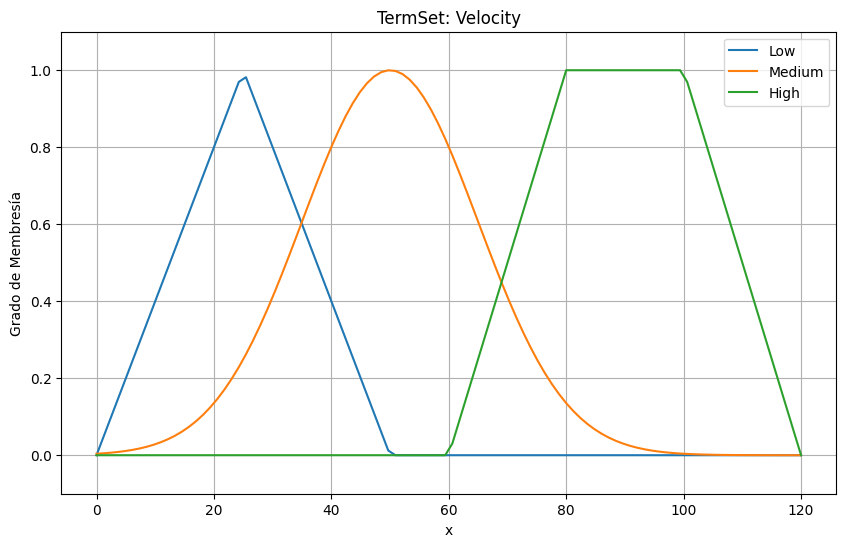

In [57]:
temperature_terms.plot()
humidity_terms.plot()
velocity_terms.plot()

In [60]:
inputs = {"Temperature": 10, "Humidity": 90}  # Valores extremos
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Fuzzificación: {'Temperature': {'Cold': array(0.33333333), 'Warm': np.float64(0.32465246735834974), 'Hot': array(0.)}, 'Humidity': {'Dry': array(0.), 'Normal': np.float64(0.028565500784550377), 'Wet': array(1.)}}
Evaluando regla: Si Temperature es Warm y Humidity es Wet, entonces salida es Medium., Fuerza de activación: 0.32465246735834974
Evaluando regla: Si Temperature es Cold y Humidity es Dry, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Dry, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Normal, entonces salida es Low., Fuerza de activación: 0.028565500784550377
Evaluando regla: Si Temperature es Cold y Humidity es Wet, entonces salida es Low., Fuerza de activación: 0.3333333333333333
Evaluando regla: Si Temperature es Warm y Humidity es Dry, entonces salida es Medium., Fuerza de activación: 0.0
La regla Si Temperature es Warm y Humidity es Dry, entonces salida es Medium. no se activó.

In [59]:
inputs = {"Temperature": 40, "Humidity": 70}  # Valores extremos
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Fuzzificación: {'Temperature': {'Cold': array(0.), 'Warm': np.float64(0.32465246735834974), 'Hot': array(0.5)}, 'Humidity': {'Dry': array(0.), 'Normal': np.float64(0.41111229050718745), 'Wet': array(0.66666667)}}
Evaluando regla: Si Temperature es Warm y Humidity es Wet, entonces salida es Medium., Fuerza de activación: 0.32465246735834974
Evaluando regla: Si Temperature es Cold y Humidity es Dry, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Dry, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Normal, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Normal, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Cold y Humidity es Wet, entonces salida es Low., Fuerza de activación: 0.0
La regla Si Temperature es Cold y Humidity es Wet, entonces salida es Low. no se activó.
Evaluando regla: Si Temperature es Warm y Humidity es D